In [1]:
import numpy as np
from osgeo import gdal
import imageio.v2 as imageio

In [2]:
img1 = imageio.imread('/media/reginaldo/pfc-dados/dataset-piloto/cenas-teste/2021-11-02/11_02_2m.tif')
linhas, colunas = img1.shape[0], img1.shape[1]
mask1 = imageio.imread('/media/reginaldo/pfc-dados/dataset-piloto/cenas-teste/2021-11-02/treino1/mascara-02-11-2021.tif')
mask2 = imageio.imread('/media/reginaldo/pfc-dados/dataset-piloto/cenas-teste/2021-12-03/treino1/mascara-03-12-2021.tif')
mask3 = imageio.imread('/media/reginaldo/pfc-dados/dataset-piloto/cenas-teste/2022-03-06/treino1/mosaico-2022-03-06.tif')

mascara = np.zeros((img1.shape[0], img1.shape[1]))

In [3]:
for x in range(linhas):
    for y in range(colunas):
        if mask1[x, y] == 0:
            mascara[x, y] = 1    
        elif mask2[x, y] == 0:
            mascara[x, y] = 2
        elif mask3[x, y] == 0:
            mascara[x, y] = 3
        else:
            mascara[x, y] = 1

In [4]:
ds=gdal.Open('/media/reginaldo/pfc-dados/dataset-piloto/cenas-teste/2021-11-02/11_02_2m.tif')

driver = gdal.GetDriverByName('GTiff')
rows, cols = mascara.shape
geo_transform = ds.GetGeoTransform()
projection = ds.GetProjection()

DataSet = driver.Create('/media/reginaldo/pfc-dados/dataset-piloto/cenas-teste/mascaras-pixels//mascara-21-11-02-e-21-12-03-e-22-03-06.tif', cols, rows, 1, gdal.GDT_Byte)
DataSet.SetGeoTransform(geo_transform)
DataSet.SetProjection(projection)

DataSet.GetRasterBand(1).WriteArray(mascara)
DataSet = None

In [18]:
from osgeo import ogr, gdal
import matplotlib.pyplot as plt

In [13]:
ds = gdal.Open("/media/reginaldo/pfc-dados/dataset-piloto/cenas-teste/mascaras-pixels/mascara-21-11-02-e-21-12-03-e-22-03-06.tif")
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

band = ds.GetRasterBand(1)
array = band.ReadAsArray()

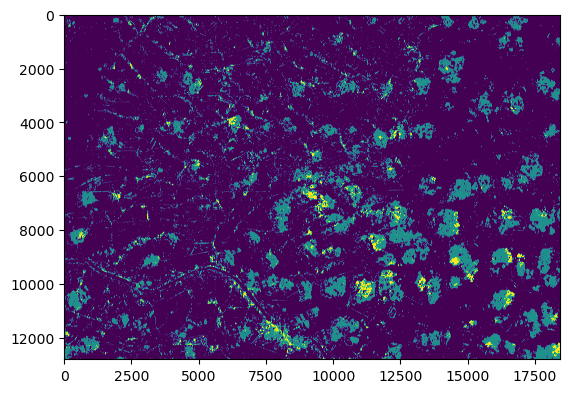

In [20]:
plt.figure()
plt.imshow(array)